In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/


In [3]:
 cd/gdrive/MyDrive/Document_Classification/

/gdrive/MyDrive/Document_Classification


In [4]:
ls

data.csv                       text-document-classification-clustering.ipynb
document-classification.ipynb  text-document-classification.ipynb


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
import subprocess
from nltk.corpus import wordnet

In [8]:
# Libraries for NLP
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

In [9]:
# Reading the data
df = pd.read_csv('data.csv')

In [10]:
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [11]:
# Getting the info, checking null etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


According to the Data Definition, the labels are as follows -                   
Politics = 0                                                                  
Sport = 1                                                                       
Technology = 2                                                                  
Entertainment = 3                                                               
Business = 4

<Axes: xlabel='Label', ylabel='count'>

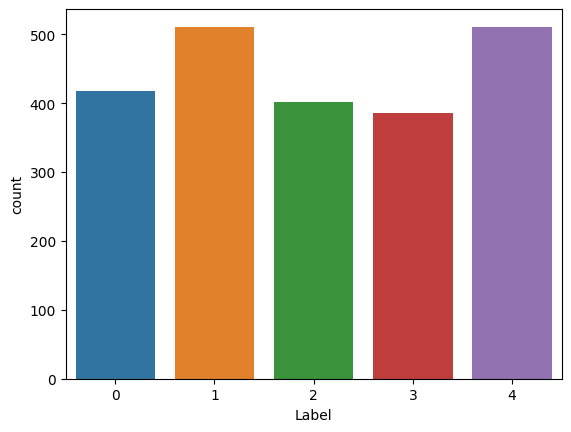

In [12]:
# Checking the o/p class
sns.countplot(x = df['Label'])

There is no up or down sampling needed as output Labels are more or less evenly distributed.

In [13]:
# We are going for standard ML approch
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler

In [14]:
y = df['Label']
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Name: Label, Length: 2225, dtype: int64


In [15]:
# Data Preprocessing
def text_cleaning(txt):
    txt = txt.lower()
    txt = re.sub(r'[^a-zA-Z\s]', '', txt)
    words = [word for word in txt.split(' ') if word not in stopwords.words("english")]
    txt = ' '.join(wnl.lemmatize(word) for word in words)
    return txt

In [16]:
# Preprocessing the text content
df['processed'] = df['Text'].apply(lambda x: text_cleaning(x))

In [17]:
# Splitting the data between training and test set
X_train, X_test, y_train, y_test = train_test_split(df['processed'], y, test_size=0.2, random_state=101)

In [18]:
# Let us apply now different classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from datetime import datetime

Even though Logistic Regression and SVM should not be applied for multiclass classification, I have still applied it in order to check the performance of different classification algorithms.                                                                                                                            For Feature extraction, I have used TfIdf Vectorizer as it has been one of the most useful way of representing text features.

In [20]:
from datetime import datetime
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, X_test, y_train, y_test are defined

# Open a file for writing
with open('model_results.txt', 'w') as f:
    models = {
        'Logistic Regression': LogisticRegression(),
        'Support Vector Classifier': SVC(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Neural Network': MLPClassifier(),
        'Stochastic Gradient Descent': SGDClassifier(),
        'KNN': KNeighborsClassifier()
    }

    for model, algorithm in models.items():
        try:
            start_time = datetime.now()

            pipe = Pipeline([('tfIdf', TfidfVectorizer()), ('model', algorithm)])

            pipe.fit(X_train, y_train)
            end_time = datetime.now()

            prediction = pipe.predict(X_test)

            f.write("\n \n ======= For {} ============".format(model))
            f.write('Accuracy Score : {} '.format(accuracy_score(prediction, y_test)))
            f.write('Confusion Matrix \n\n  {}'.format(confusion_matrix(prediction, y_test)))
            f.write('\n Classification Report \n ')
            f.write(classification_report(prediction, y_test))

            time_difference = (end_time - start_time).total_seconds() * 10**3
            f.write("Execution time of program is: {} ms".format(time_difference))

        except Exception as e:
            print('Exception Occurred for {},  {}'.format(model, e))
            f.write('Exception Occurred for {},  {}'.format(model, e))